In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

from helper import load_train_dataset, load_test_dataset, drop_zero_mean, submit, display

%matplotlib inline

In [22]:
train_orig, labels = load_train_dataset()

In [23]:
train_orig.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

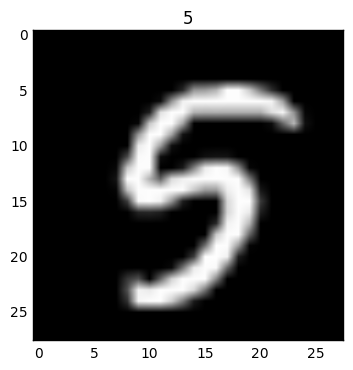

In [24]:
img_num, label = 0, 5
display(train_orig, labels, img_num, label, 'gray')

In [25]:
train_orig.iloc[:, 50].value_counts()

0      41997
184        1
117        1
141        1
Name: pixel50, dtype: int64

In [26]:
train_orig.iloc[:, 50].clip(0, 1).value_counts()

0    41997
1        3
Name: pixel50, dtype: int64

In [27]:
train_orig = train_orig.clip(0, 1)
train_orig.iloc[:, 50].value_counts()

0    41997
1        3
Name: pixel50, dtype: int64

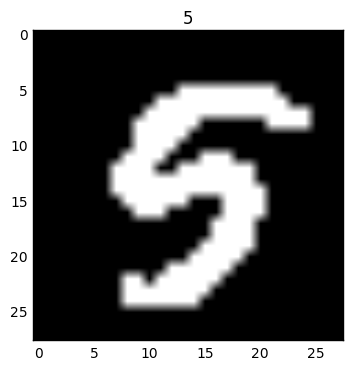

In [28]:
display(train_orig, labels, img_num, label, 'binary')

In [29]:
train_orig.iloc[:, 60].value_counts()

0    41995
1        5
Name: pixel60, dtype: int64

## Remove values with 0 mean

In [11]:
train = drop_zero_mean(train_orig)
train.head()

,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Proportion of classes

In [12]:
labels.value_counts().sort_index() # looks Okay, no oversampling

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

## Time to learn

In [13]:
X, Y = train.values, labels.values

In [14]:
pipe = Pipeline([('clf', RandomForestClassifier(n_estimators=100))])

In [15]:
param_grid = {'clf__n_estimators': [10, 50, 100]}
cv = GridSearchCV(pipe, param_grid=param_grid, verbose=3, cv=5)
cv.fit(X, Y)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] clf__n_estimators=10 ............................................
[CV] ................... clf__n_estimators=10, score=0.943486 -   2.5s
[CV] clf__n_estimators=10 ............................................
[CV] ................... clf__n_estimators=10, score=0.943116 -   2.2s
[CV] clf__n_estimators=10 ............................................
[CV] ................... clf__n_estimators=10, score=0.941898 -   2.4s
[CV] clf__n_estimators=10 ............................................
[CV] ................... clf__n_estimators=10, score=0.944266 -   2.4s
[CV] clf__n_estimators=10 ............................................
[CV] ................... clf__n_estimators=10, score=0.944140 -   2.4s
[CV] clf__n_estimators=50 ............................................
[CV] ................... clf__n_estimators=50, score=0.962879 -   9.6s
[CV] clf__n_estimators=50 ............................................
[CV] ............

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(steps=[('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'clf__n_estimators': [10, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [16]:
cv.grid_scores_

[mean: 0.94338, std: 0.00085, params: {'clf__n_estimators': 10},
 mean: 0.96312, std: 0.00099, params: {'clf__n_estimators': 50},
 mean: 0.96488, std: 0.00130, params: {'clf__n_estimators': 100}]

In [17]:
cv.best_score_

0.96488095238095239

In [18]:
cv.best_params_

{'clf__n_estimators': 100}

In [19]:
test = load_test_dataset()
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test = test.apply(lambda x: x.clip(0, 1))
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
submit(cv.best_estimator_, test.loc[:, train.columns], 'output2.csv')

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
5,6,7
6,7,0
7,8,3
8,9,0
9,10,3
